In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
base_dir = os.path.dirname(os.path.abspath("..\data"))
path = os.path.join(base_dir, r"data")
os.chdir(path) 

In [3]:
df = pd.read_csv("Cleaned data\data.csv")
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'HUMIDITY', 'WINDSPEED', 'DATE', 'TOTALDEMAND',
       'HOLIDAY', 'MIN', 'MAX', 'RAIN', 'SOLAR', 'RRP', 'FORECASTDEMAND',
       'OUTPUT', 'MONTHDATE', 'WEEKDAY', 'WEEKEND', 'TEMPAVE'],
      dtype='object')

In [4]:
df_lim = df[df["YEAR"]==2022]

## Descriptive Statistics

In [5]:
df.describe()

,YEAR,MONTH,DAY,HUMIDITY,WINDSPEED,TOTALDEMAND,HOLIDAY,MIN,MAX,RAIN,SOLAR,RRP,FORECASTDEMAND,OUTPUT,WEEKDAY,WEEKEND,TEMPAVE
count,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000
mean,2018.564327,6.326511,15.766569,0.671643,20.111140,7885.178604,0.048733,12.458674,24.289474,2.773002,15.898782,68.744215,7867.454817,170.121084,3.001949,0.286062,18.348733
std,1.901590,3.385030,8.783578,0.137237,6.520327,746.343660,0.278541,5.783630,5.579440,10.412697,6.969612,23.858372,787.374452,120.395969,1.999511,0.452029,5.249450
min,2016.000000,1.000000,1.000000,0.000000,0.000000,5983.135104,0.000000,-1.400000,9.600000,0.000000,1.000000,0.000000,5518.989111,24.640000,0.000000,0.000000,0.000000
25%,2017.000000,3.000000,8.000000,0.586279,15.046825,7345.322083,0.000000,7.775000,19.900000,0.000000,10.900000,50.174698,7314.940278,73.480000,1.000000,0.000000,13.950000
50%,2018.000000,6.000000,16.000000,0.682257,19.086031,7822.739983,0.000000,12.500000,23.800000,0.000000,14.600000,70.174583,7790.954394,133.220000,3.000000,0.000000,18.350000
75%,2020.000000,9.000000,23.000000,0.770861,24.005319,8463.938090,0.000000,17.300000,27.600000,0.400000,20.725000,84.390302,8433.714851,243.850000,5.000000,1.000000,22.200000
max,2022.000000,12.000000,31.000000,0.957143,44.595238,9904.372611,2.000000,28.100000,47.000000,159.600000,32.200000,159.940000,10751.957092,495.020000,6.000000,1.000000,34.400000


## Visuals

In [6]:
# set variables
Date = df_lim.DATE
Temp = df_lim.TEMPAVE
Demand = df_lim.TOTALDEMAND
Rain = df_lim.RAIN
Solar = df_lim.SOLAR
Output = df_lim.OUTPUT
RRP = df_lim.RRP
WindSpeed = df_lim.WINDSPEED
Humidity = df_lim.HUMIDITY
Holiday = df_lim.HOLIDAY
Weekday = df_lim.WEEKDAY
Weekend = df_lim.WEEKEND 

### Time Series Plots

#### Demand by Date

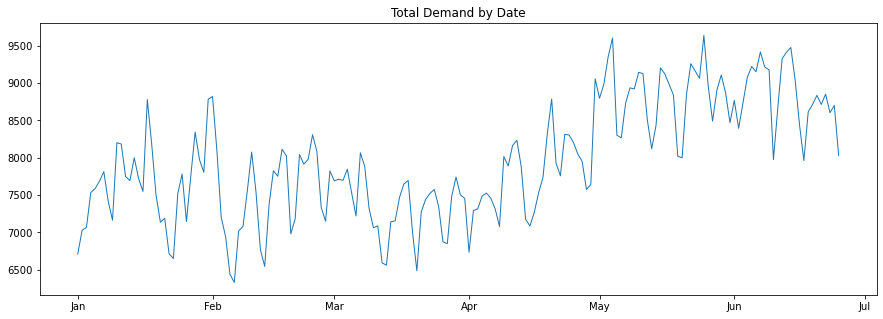

In [7]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Date, Demand, linewidth=1)
ax.set_title("Total Demand by Date")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show() 

#### Temperature by Date

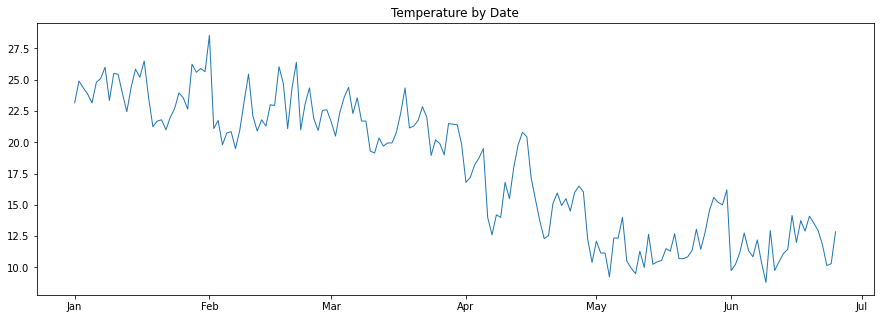

In [8]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Date, Temp, linewidth=1)
ax.set_title("Temperature by Date")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

#### Rain by Date

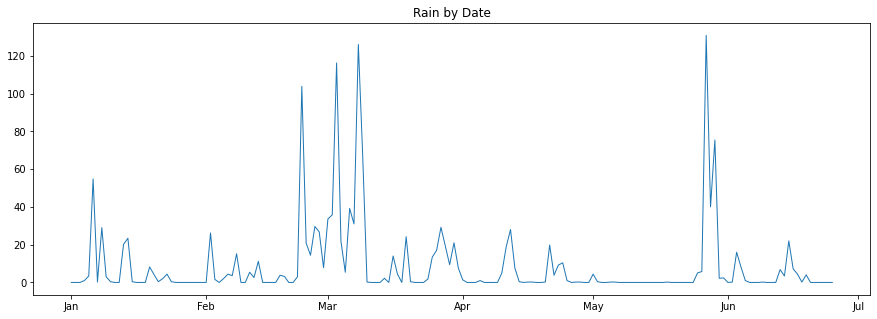

In [9]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Date, Rain, linewidth=1)
ax.set_title("Rain by Date")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

#### Solar Exposure by Date

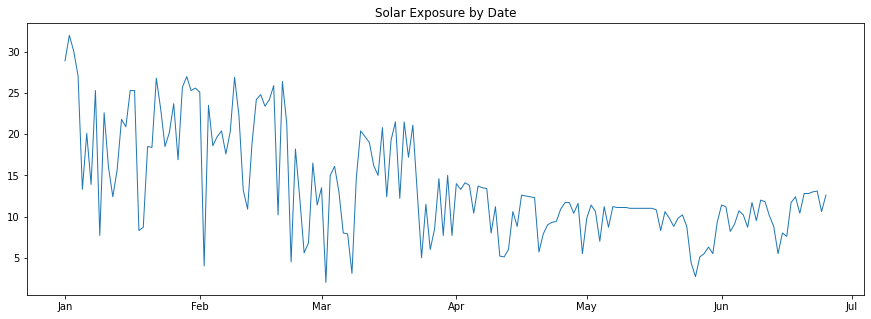

In [10]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Date, Solar, linewidth=1)
ax.set_title("Solar Exposure by Date")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

#### Humidity by Date

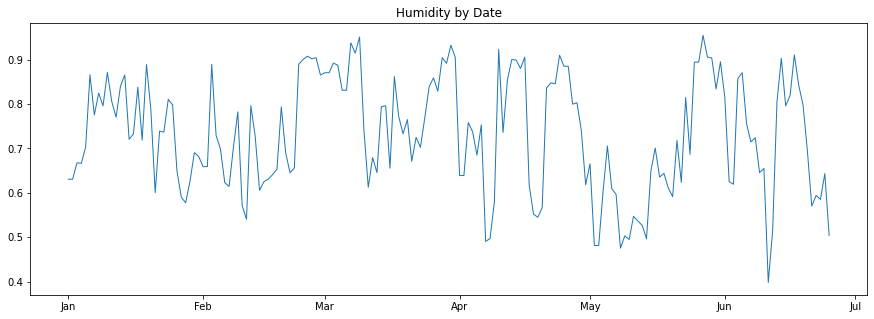

In [11]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Date, Humidity, linewidth=1)
ax.set_title("Humidity by Date")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

#### Windspeed by Date

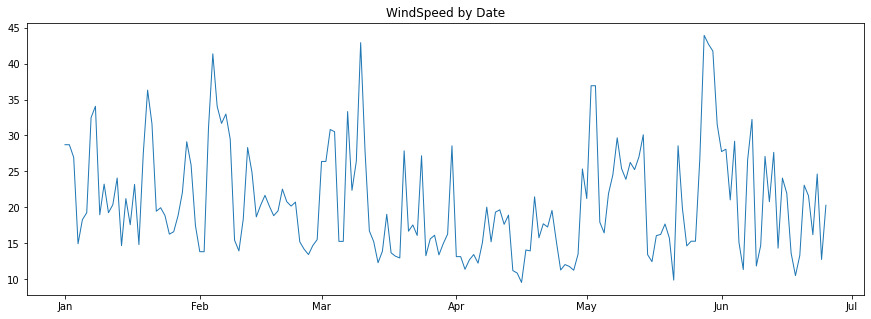

In [12]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Date, WindSpeed, linewidth=1)
ax.set_title("WindSpeed by Date")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

### Correlation Analysis

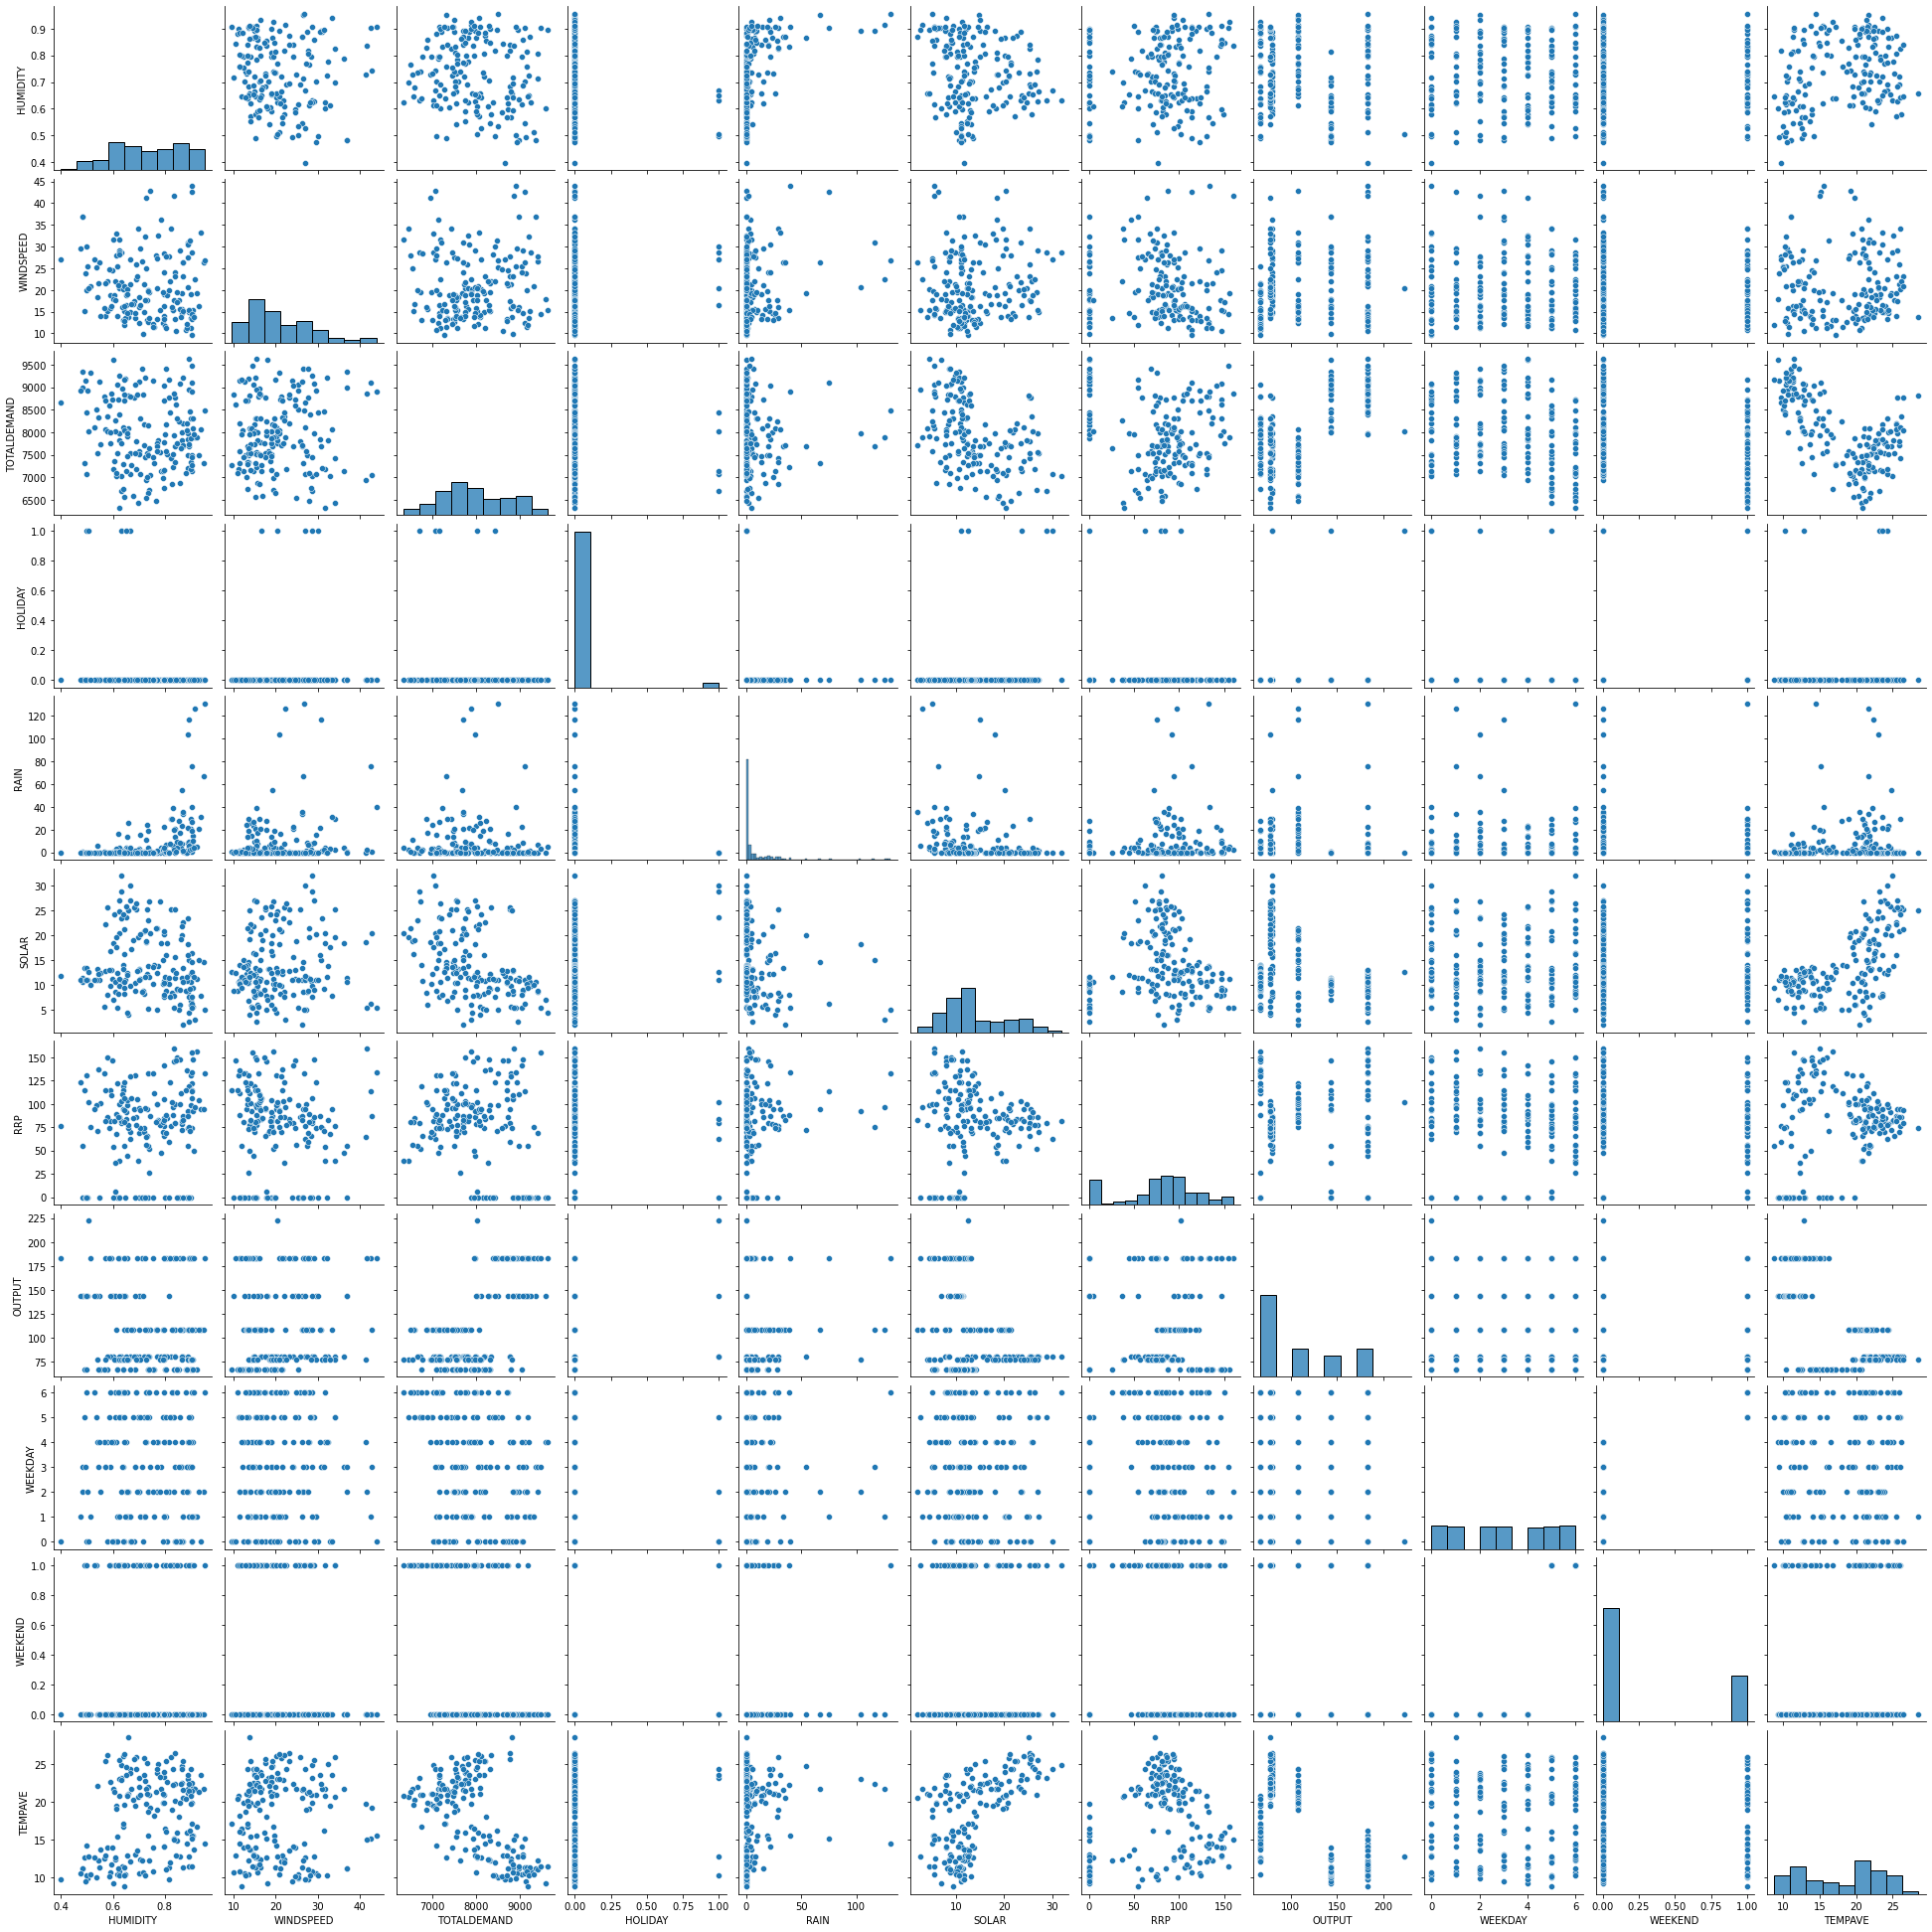

In [13]:
df_pp = df_lim[["HUMIDITY","WINDSPEED","TOTALDEMAND","HOLIDAY","RAIN","SOLAR","RRP","OUTPUT","WEEKDAY","WEEKEND","TEMPAVE"]]
sns.pairplot(df_pp) 

### Outlier Analysis

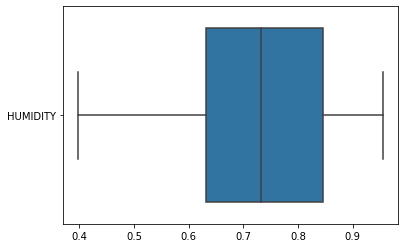

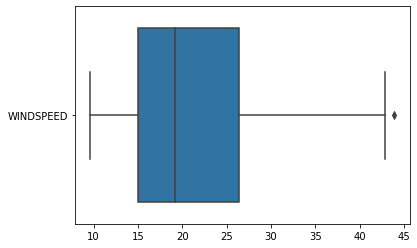

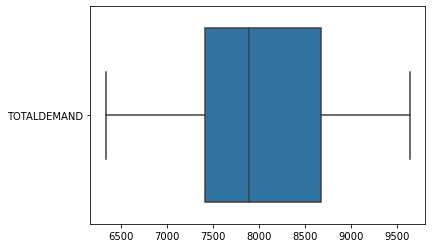

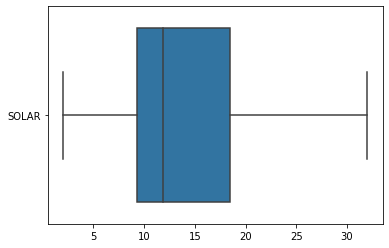

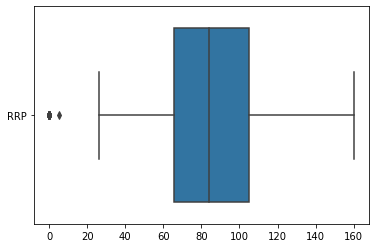

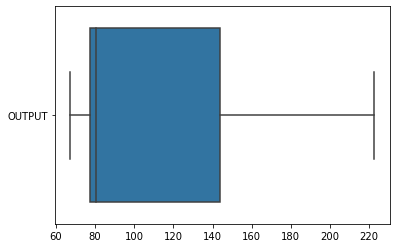

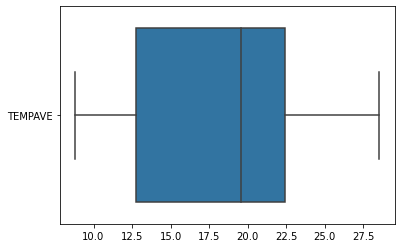

In [15]:
df_box = df_lim[["HUMIDITY","WINDSPEED","TOTALDEMAND","SOLAR","RRP","OUTPUT","TEMPAVE"]]
for col in df_box.columns:
    sns.boxplot(data=df_box[[col]], orient="h")
    plt.show()